# Citi Bike Time Series Analysis (2021 - 2023)

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6);">Abstract</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <p><strong>Context:</strong> <br></br>
Citi Bike is a popular bike-sharing program in New York City, providing a convenient and eco-friendly transportation option for residents and visitors. Launched in 2013, it has become an integral part of the city's transportation network, offering thousands of bikes at numerous docking stations across Manhattan, Brooklyn, and Queens.
    </p>  
    <br><br/>
    <p>
    <strong>Objectives:</strong>
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;">Conducting a Comprehensive Time Series Analysis Analyzed Citi Bike trip data from 2021 to 2023, comprising 2.5 million rows, to uncover trends, seasonal patterns, and potential customer churn using <strong>quarter-over-quarter SaaS metrics</strong>.</li>
        <li style="margin-bottom: 10px;">Discover potential marketing Campaign by leveraged insights from observed usage patterns.</li>
    </ul>
    <br/>
</div>

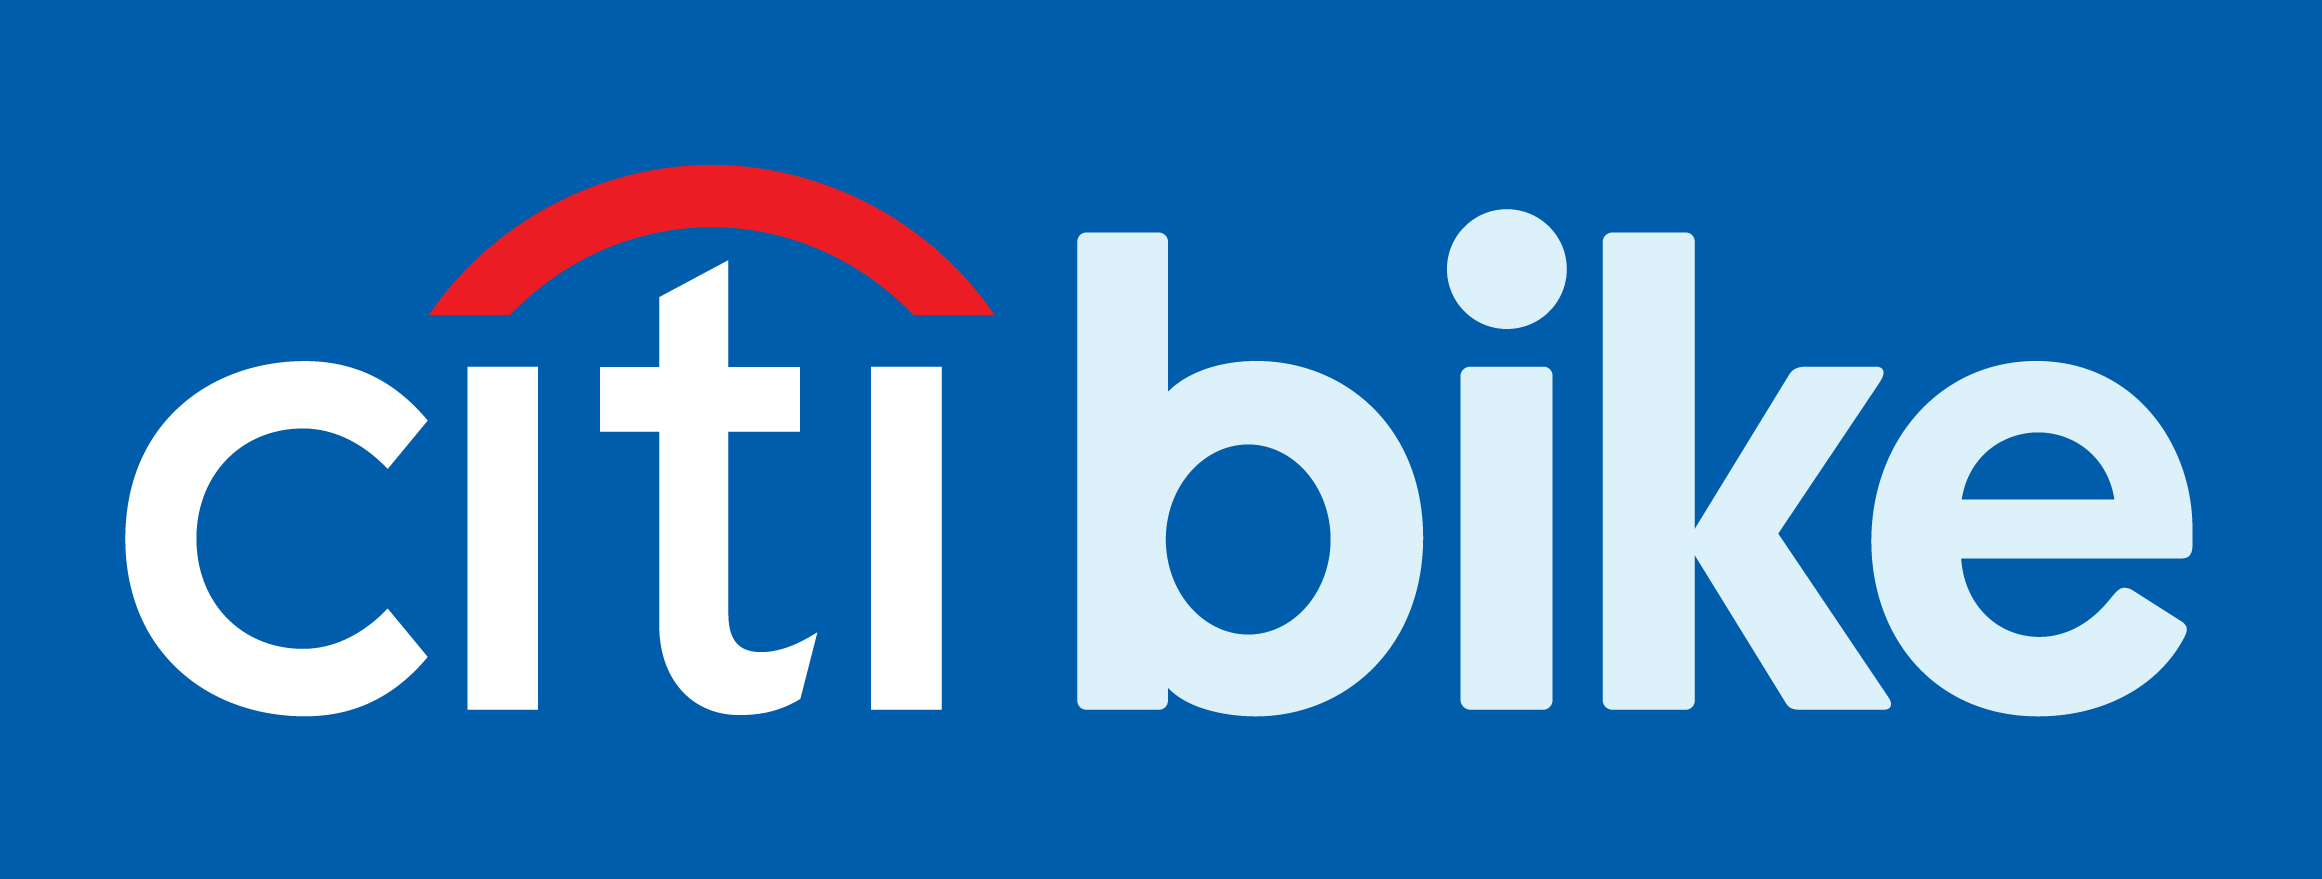

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6);">Data Dictionary</h2>

<table>
    <tr>
        <th>Variable</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>ride_id</td>
        <td>A unique identifier assigned to each ride.</td>
    </tr>
    <tr>
        <td>rideable_type</td>
        <td>The type of bike used for the ride (e.g., classic bike, electric bike).</td>
    </tr>
    <tr>
        <td>started_at</td>
        <td>The date and time when the ride started.</td>
    </tr>
    <tr>
        <td>ended_at</td>
        <td>The date and time when the ride ended.</td>
    </tr>
    <tr>
        <td>start_station_name</td>
        <td>The name of the station where the ride started.</td>
    </tr>
    <tr>
        <td>start_station_id</td>
        <td>A unique identifier for the start station.</td>
    </tr>
    <tr>
        <td>end_station_name</td>
        <td>The name of the station where the ride ended.</td>
    </tr>
    <tr>
        <td>end_station_id</td>
        <td>A unique identifier for the end station.</td>
    </tr>
    <tr>
        <td>start_lng</td>
        <td>The latitude coordinate of the start station.</td>
    </tr>
    <tr>
        <td>start_lat</td>
        <td>The longitude coordinate of the start station.</td>
    </tr>
    <tr>
        <td>end_lng</td>
        <td>The latitude coordinate of the end station.</td>
    </tr>
    <tr>
        <td>end_lat</td>
        <td>The longitude coordinate of the end station.</td>
    </tr>
        <tr>
        <td>member_casual</td>
        <td>Indicates whether the rider is a member (subscriber) or a casual (non-subscriber) user.</td>
    </tr>
</table>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <p>In this time series analysis project, I will be using the <a href="https://s3.amazonaws.com/tripdata/index.html" download>Citibike tripdata Dataset</a>. This project aims to provide a fundamental understanding and hands-on practice in Exploratory Data Analysis (EDA) to extract trends and patterns in a real-world bike-sharing system.
    </p>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6);">Import Packages</h2>

In [1]:
# Import Operational Packages
import pandas as pd
import numpy as np

# Import Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6);">Load Dataset</h2>

In [2]:
# Read the .CSV files to load data 
df_2021 = pd.read_csv('JC-2021-citibike-tripdata.csv')   # 2021
df_2022 = pd.read_csv('JC-2022-citibike-tripdata.csv')   # 2022
df_2023 = pd.read_csv('JC-2023-citibike-tripdata.csv')   # 2023

In [3]:
# Concat the data from 2021 to 2023 
citibike_df = pd.concat([df_2021, df_2022, df_2023])

# Display the first 5 rows
citibike_df.head(5)

ride_id rideable_type                started_at                  ended_at  \
0     NaN   docked_bike  2021-01-01 00:03:35.5100  2021-01-01 00:08:01.7770   
1     NaN   docked_bike  2021-01-01 00:23:32.9250  2021-01-01 00:49:16.0830   
2     NaN   docked_bike  2021-01-01 00:23:50.7940  2021-01-01 00:48:12.5660   
3     NaN   docked_bike  2021-01-01 00:31:09.0770  2021-01-01 00:44:22.9430   
4     NaN   docked_bike  2021-01-01 00:35:52.1900  2021-01-01 00:45:48.7740   

  start_station_name start_station_id end_station_name end_station_id  \
0       Manila & 1st            JC082     Brunswick St          JC023   
1           Grand St            JC102   Van Vorst Park          JC035   
2           Grand St            JC102   Van Vorst Park          JC035   
3          City Hall            JC003     Newport Pkwy          JC008   
4         Harborside            JC104     Brunswick St          JC023   

   start_lat  start_lng    end_lat    end_lng member_casual  
0  40.721651 -74.042884  40.724176 -74.050656        member  
1  40.715178 -74.037683  40.718489 -74.047727        casual  
2  40.715178 -74.037683  40.718489 -74.047727        casual  
3  40.717732 -74.043845  40.728745 -74.032108        casual  
4  40.719252 -74.034234  40.724176 -74.050656        casual

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6);">Exploratory Data Analysis</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <p>Data cleaning is a crucial part of the Exploratory Data Analysis (EDA) process. It involves preparing raw data for analysis by identifying and fixing errors or inconsistencies. This step ensures that the dataset is accurate, consistent, and complete, which is essential for obtaining reliable insights and making informed decisions. 
    
First, I will convert the `started_at` and `ended_at` columns to datetime format. Afterward, I will create new columns from these datetime columns to represent different time periods: year, quarter, month, week, and day of the week. Lastly, I will create a subset dataframe called **citibike_no_outliers** that excludes all outliers in the `trip_duration_mins` column.    
</p>
    <p><strong>For this part of the project we will:</strong></p>
    <ul style="list-style-position: inside; padding-left: 20px;">
        <li style="margin-bottom: 10px;">EDA | Data-Time Conversion</li>
        <li style="margin-bottom: 10px;">EDA | Deriving New Columns </li>
        <li style="margin-bottom: 10px;">EDA | Outliers </li>
    </ul>
</div>

## EDA | Data-Time Conversion

In [4]:
# Convert `started_at` & `ended_at` into datetime columns
citibike_df['started_at'] = pd.to_datetime(citibike_df['started_at'], format='ISO8601')
citibike_df['ended_at'] = pd.to_datetime(citibike_df['ended_at'], format='ISO8601')

In [5]:
# Boolean Mask that exlude trips that are ended after year of 2023-12-31
date_mask =  citibike_df['ended_at'] < '2024-01-01'


# Aplly the date_mask
citibike_df = citibike_df[date_mask]

## EDA | Deriving New Columns

In [6]:
# Create a new column called `year`
citibike_df['year'] =  citibike_df['ended_at'].dt.strftime('%Y')


# Create a new column cakked `quarter`
citibike_df['quarter'] = citibike_df['ended_at'].dt.to_period('Q').dt.strftime('%Y-Q%q')

In [7]:
# Create a new column called 'month'
citibike_df['month'] = citibike_df['ended_at'].dt.strftime('%b')


# Create a month custom order list for sorting 
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


# Convert the `month` column into a Categorical datatype, and assigned sorted categories
citibike_df['month'] = pd.Categorical(citibike_df['month'], categories=month_order, ordered=True)

In [8]:
# Create new column called `week` YYYY-W00 
citibike_df['week'] = citibike_df['ended_at'].dt.strftime('%Y-W%V')

In [9]:
# Create a 'day_of_week' column 
citibike_df['day_of_week'] = citibike_df['ended_at'].dt.strftime('%a')


# Create a custom sort list for 'day_of_week'
day_of_week_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


# Convert the `day_of_week` column to categorical datatype
citibike_df['day_of_week'] = pd.Categorical(citibike_df['day_of_week'], categories=day_of_week_order, ordered=True)

In [10]:
# Create a new column called ` date ` 
citibike_df['date'] = citibike_df['ended_at'].dt.strftime('%x')


# Compute a `trip_duration_mins` 
citibike_df['trip_duration_mins'] = ((citibike_df['ended_at'] - citibike_df['started_at']).dt.seconds / 60).round(2)


# Check the new `trip_duration_mins` column
citibike_df[citibike_df['trip_duration_mins'] < 0]  # Duration can't be less than 0

Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual, year, quarter, month, week, day_of_week, date, trip_duration_mins]
Index: []

In [11]:
# Check the new columns 
citibike_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2448078 entries, 0 to 908162
Data columns (total 20 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  year                object        
 14  quarter             object        
 15  month               category      
 16  week                object        
 17  day_of_week         category      
 18  date                object        
 19  trip_duration_mins  float64       
dtypes: categ

## EDA | Outliers

In [12]:
# Calculate the Outliers
Q1 = citibike_df['trip_duration_mins'].quantile(0.25)
Q3 = citibike_df['trip_duration_mins'].quantile(0.75)


# Compute the IQR
IQR = Q3 - Q1


# Define the lower & upper limits
lower_limit = Q1 - 3 * IQR 
upper_limit = Q3 + 3 * IQR


print('Lower Limit: ', lower_limit)
print('Upper Limit: ', upper_limit)

Lower Limit:  -18.5
Upper Limit:  35.05


In [13]:
# Boolean mask that select Rows that are outliers in the  `trip_duration_mins` column
outlier_mask = (citibike_df['trip_duration_mins'] < lower_limit) | (citibike_df['trip_duration_mins'] > upper_limit)


# Subset Non-outlier dataframe
citibike_no_outliers = citibike_df[~outlier_mask]   # Select Non-Outlier rows


print('Citibike_df Rows:          ', len(citibike_df))
print('Citibike_no_outliers Rows: ', len(citibike_no_outliers))

Citibike_df Rows:           2448078
Citibike_no_outliers Rows:  2304364


<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6);">Exploratory Data Analysis (Visualizations)</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <p>Data Visualization is a vital component of Exploratory Data Analysis (EDA). It involves the graphical representation of data to uncover patterns, trends, and insights that might not be immediately apparent from raw data. Effective data visualization allows analysts to quickly understand complex datasets, identify relationships, and communicate findings in an accessible and compelling manner.</p>

<strong>For This Project Here are Visualizations:</strong>
    <ul style="list-style-type: none; padding-left: 0; margin-top: 10px;">
        <li style="margin-bottom: 10px;"><strong>EDA | Visualization 1:</strong> Quarterly Trip Traffic ( Casual & Member ) </li>
        <li style="margin-bottom: 10px;"><strong>EDA | Visualization 2:</strong> Quaterly Average Trip Duration ( Casual & Member ) </li><br>
        <li style="margin-bottom: 10px;"><strong>EDA | Visualization 3:</strong> Quarter over Quarter Traffic Growth Rate ( Member ) </li>
        <li style="margin-bottom: 10px;"><strong>EDA | Visualization 4:</strong> Monthly Average Trip Duration ( Casual & Member ) </li><br>
        <li style="margin-bottom: 10px;"><strong>EDA | Visualization 5:</strong> Top 10 Start Station w/ Highest Traffic ( Casual ) </li>
        <li style="margin-bottom: 10px;"><strong>EDA | Visualization 6:</strong> Top 10 End Station w/ Highest Traffic ( Casual ) </li><br>
        <li style="margin-bottom: 10px;"><strong>EDA | Visualization 7:</strong> Top 10 Start Station w/ Highest Traffic ( Member )</li>
        <li style="margin-bottom: 10px;"><strong>EDA | Visualization 8:</strong> Top 10 End Station w/ Highest Traffic ( Member ) </li><br>
        <li style="margin-bottom: 10px;"><strong>EDA | Visualization 9:</strong> Weekly Trip Traffic ( Casual & Member ) </li>
        <li style="margin-bottom: 10px;"><strong>EDA | Visualization 10:</strong> Weekly Average Trip Duration ( Casual & Member ) </li><br>
        <li style="margin-bottom: 10px;"><strong>EDA | Visualization 11:</strong> Day of Week Trip Traffic ( Casual & Member ) </li>
        <li style="margin-bottom: 10px;"><strong>EDA | Visualization 12:</strong> Day of Week Average Trip Duration ( Casual & Member ) </li><br>
        <li style="margin-bottom: 10px;"><strong>EDA | Visualization 13:</strong> Time of the Day Traffic Distribution ( Casual & Member ) </li>
        <li style="margin-bottom: 10px;"><strong>EDA | Visualization 14:</strong> Annual Day to Day Trip Count ( Casual & Member ) </li>
    </ul>
</div>

## EDA | Visualization 1
**`Grouped Bar Plot:`  Quarterly Trip Traffic ( Casual & Member )**

In [14]:
# Get traffic count per `Quarter`, for member types `member_casual`.
member_casual_by_quarter = citibike_df.groupby(['quarter','member_casual'])[['ride_id']].count().reset_index()


# Rename the aggregated column `ride_id` to `trip_count`
member_casual_by_quarter = member_casual_by_quarter.rename(columns={'ride_id':'trip_count'})


# Display the data
member_casual_by_quarter.head(5)

quarter member_casual  trip_count
0  2021-Q1        casual        6058
1  2021-Q1        member       15943
2  2021-Q2        casual       59893
3  2021-Q2        member       80342
4  2021-Q3        casual      122857

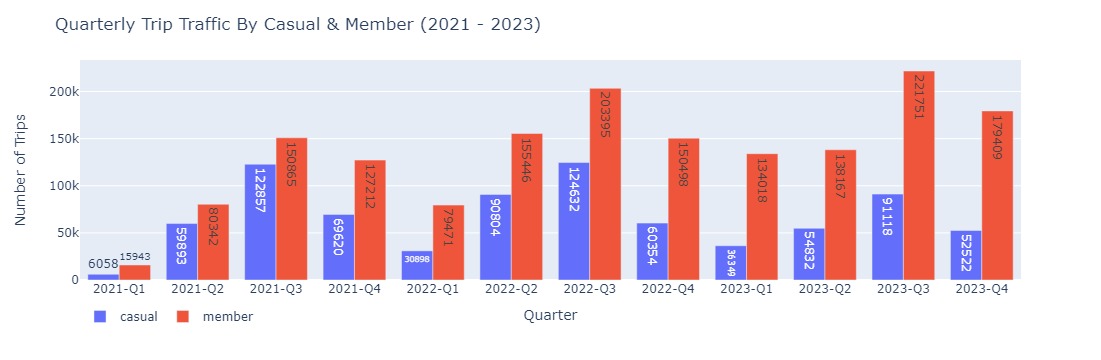

In [15]:
# Plot a groupped bar graph
fig = px.bar(member_casual_by_quarter, x='quarter', y='trip_count', color='member_casual', barmode='group', text='trip_count')


# Update the layout
fig.update_layout(title='Quarterly Trip Traffic By Casual & Member (2021 - 2023)',    # Title
                  xaxis_title='Quarter', yaxis_title='Number of Trips',               # X-axis & Y-axis Title
                  legend_title='', legend_orientation='h')                            # Set Lengend title = blank
    
fig.show()

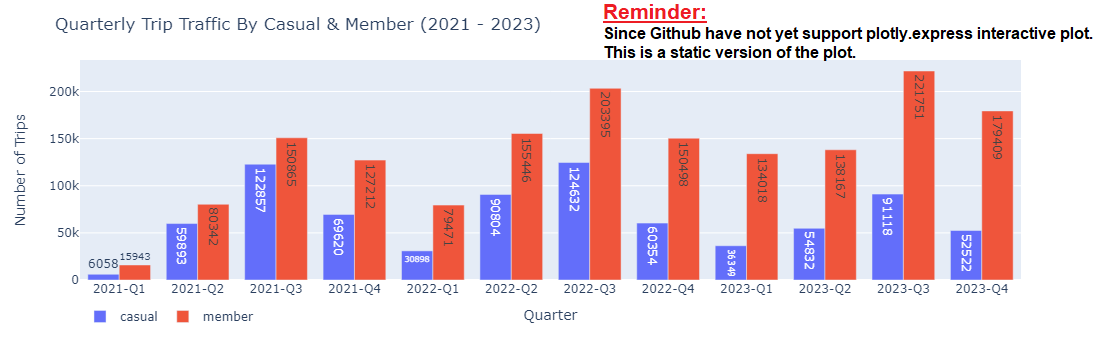

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;">
            Throughout 2021 to 2023 the member rider's trip traffic is more crowded than casual riders.
        </li>
        <li style="margin-bottom: 10px;">
            Both member and casual riders traffic tend to decreasae and increase together, this is most likely due to seasonal cycle and habits of both types of riders.
        </li>
    </ul>
</div>

## EDA | Visualization 2
**`Groupped Bar Plot:` Quaterly Average Trip Duration ( Casual & Member )**

In [16]:
# Get the Quarterly Mean `trip_duration_min` for usertypes in `member_casual`
quartly_avg_duration_members = citibike_no_outliers.groupby(['quarter','member_casual'])[['trip_duration_mins']].mean().round(1).reset_index()


# Display the data 
quartly_avg_duration_members.head(5)

quarter member_casual  trip_duration_mins
0  2021-Q1        casual                14.3
1  2021-Q1        member                 8.7
2  2021-Q2        casual                13.3
3  2021-Q2        member                 9.2
4  2021-Q3        casual                12.0

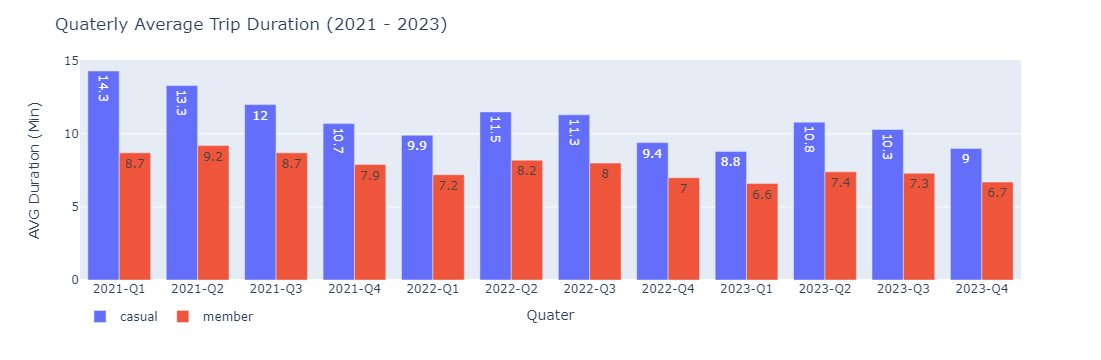

In [17]:
# Plot a groupped bar graph
fig = px.bar(quartly_avg_duration_members, x='quarter', y='trip_duration_mins', 
             color='member_casual', barmode='group', text='trip_duration_mins')


# Update the layout
fig.update_layout(title='Quaterly Average Trip Duration (2021 - 2023)',         # Title
                  xaxis_title='Quater', yaxis_title='AVG Duration (Min)',       # X-axis & Y-axis Titles
                  legend_title='', legend_orientation='h')                      # Set Legend title = blank

fig.show()

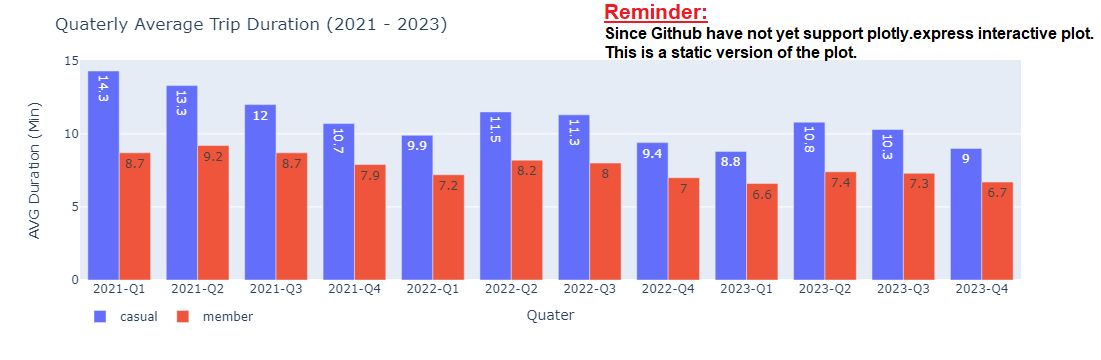

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;">
            It appears the overall average trip duration for Casual Rider are longer than Member Rider. However in majority of the quarters the casual rider's average trip duration are below 15 minutes.
        </li>
    </ul>
</div>

## EDA | Visualization 3
**`Diverging Bar Plot:` Quarter over Quarter Traffic Growth Rate ( Member )**

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <p>
<strong>Quarter over Quarter Traffic Growth Rate:</strong> <br>
The Quarter over Quarter (QoQ) Traffic Growth Rate measures the percentage change in traffic from one quarter to the next.
    </p>

<br>
<strong>Quarter over Quarter Traffic Growth Rate Formula:</strong> <br>
<br>

$$
\Huge\ QoQ  \ Growth \ Rate = \frac{Traffic_{\ Current \ Quater} - \ Traffic_{\ Previous \ Quater}}{Traffic_{\ Previous \ Quater}}\  × \ 100 \ \%
$$
</div>

In [18]:
# <Boolean Mask> Subset a members ONLY dataframe 
member_mask = member_casual_by_quarter['member_casual'] =='member'


# Apply the member_mask to extract members only dataframe
member_trip_quarter = member_casual_by_quarter[member_mask].reset_index(drop=True)


# Calculate the `quarter over quator` column
member_trip_quarter['qoq_growth'] = (member_trip_quarter['trip_count'].pct_change() * 100).round(2)


# Display the data
member_trip_quarter.head()

quarter member_casual  trip_count  qoq_growth
0  2021-Q1        member       15943         NaN
1  2021-Q2        member       80342      403.93
2  2021-Q3        member      150865       87.78
3  2021-Q4        member      127212      -15.68
4  2022-Q1        member       79471      -37.53

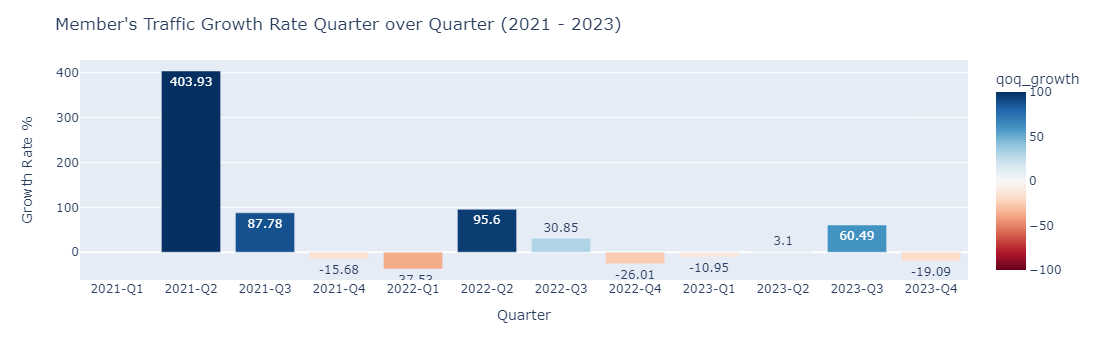

In [19]:
# Plot a Diverging Bar Chart shows QoQ growth rate
fig = px.bar(member_trip_quarter, x='quarter', y='qoq_growth', text='qoq_growth', color='qoq_growth', 
             color_continuous_scale=px.colors.sequential.RdBu, range_color=[-100, 100])

# Update layout
fig.update_layout(title="Member's Traffic Growth Rate Quarter over Quarter (2021 - 2023)", 
                  xaxis_title='Quarter', yaxis_title='Growth Rate %', height=500)

fig.show()

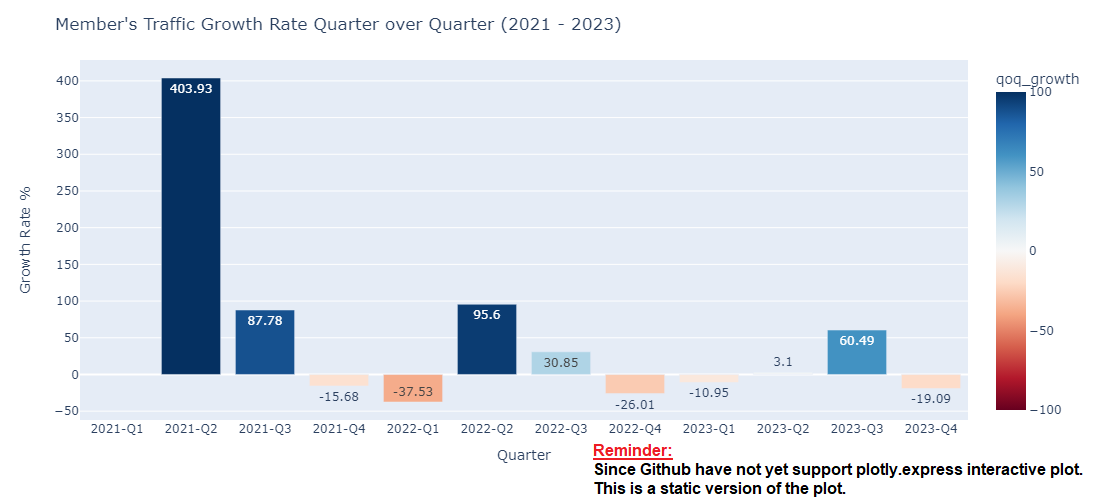

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;">
            There is a trend where the traffic rate tends to increase in <strong>Quarter 2 (April to June)</strong> and <strong>Quarter 3 (July to September)</strong>. This is most likely due to warmer temperatures and good weather conditions. Although the diverging bar chart above only shows the traffic growth rate for member riders, the traffic growth rate for casual members should exhibit a similar trend.
        </li>
        <li style="margin-bottom: 10px;">
            This traffic growth rate is measured by the number of rides made in each quarter. However, each ride does not represent a unique member rider. To find the Quarterly Active User Growth Rate, we need data that indicates which <code>ride_id(s)</code> belong to each unique member.
        </li>
    </ul>
</div>

## EDA | Visualization 4
**`Grouped Bar Plot:` Monthly Average Trip Duration ( Casual & Member )**

In [20]:
# Find the mean `trip_duration_mins` for month in each year
monthly_traffic_groupped  = citibike_no_outliers.groupby(['year','month'], observed=False)[['trip_duration_mins']].mean().round(2).reset_index()


# Sort the dataframe by `year` then sort by `month` both in ascending order
monthly_traffic_groupped = monthly_traffic_groupped.sort_values(['year','month'], ascending=[True,True])


# display the Dataframe
monthly_traffic_groupped.head(5)

year month  trip_duration_mins
0  2021   Jan                9.10
1  2021   Feb               10.19
2  2021   Mar               10.26
3  2021   Apr               10.61
4  2021   May               11.18

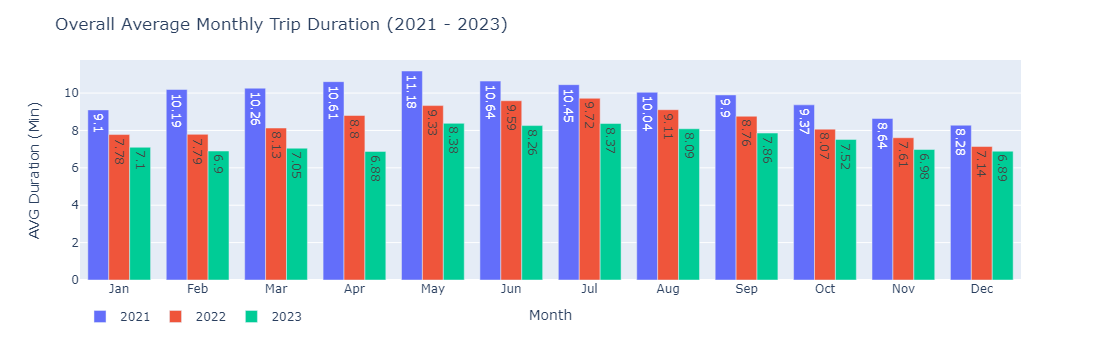

In [21]:
# Groupped Bar Chart 
fig = px.bar(monthly_traffic_groupped ,x='month', y='trip_duration_mins', 
              color='year', barmode='group', text='trip_duration_mins')

# Update layout
fig.update_layout(title='Overall Average Monthly Trip Duration (2021 - 2023)', 
                  xaxis_title='Month', yaxis_title='AVG Duration (Min)', 
                  legend_title='', legend_orientation='h')

fig.show()

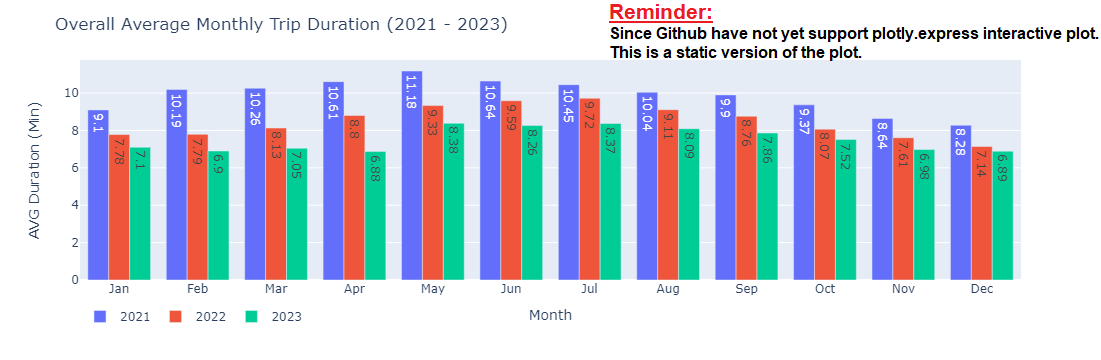

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;">
            The <strong>Overall Monthly Average Trip Duration (mins) from 2021 to 2023</strong> has been decreasing each year. This trend is worth investigating as it may indicate a potential increase in customer churn rates. Possible reasons for this decline could include changes in pricing, alterations in policies, or shifts in customer behavior.
        </li>
    </ul>
</div>

## EDA | Visualization 5
**`Bar Plot:` Top 10 Start Station w/ Highest Traffic ( Casual )**

In [22]:
# Create Boolean Mask to extract the subset dataframe for `casual` riders
mask = citibike_no_outliers['member_casual'] == 'casual'


# Applied the `Casual` rider Boolean Mask
citibike_casual = citibike_no_outliers[mask].reset_index(drop=True)


# Check if there's only `Casual` riders.
citibike_casual['member_casual'].value_counts()

member_casual
casual    709770
Name: count, dtype: int64

In [23]:
# Find ` Mean trip duration (minute) ` & ` Count number of trip ` started at each unique Stations
top10_casual_start_station = citibike_casual.groupby(['start_station_name']).agg({'trip_duration_mins':['count','mean']}).reset_index()


# Change the multindex column into single index 
top10_casual_start_station.columns = ['_'.join(col).strip() for col in top10_casual_start_station.columns]


# Top 10 highest traffic start stations
top10_casual_start_station = top10_casual_start_station.sort_values('trip_duration_mins_count', ascending=False)[:10].reset_index(drop=True)


# Display the dataframe
top10_casual_start_station

start_station_name_  trip_duration_mins_count  \
0  South Waterfront Walkway - Sinatra Dr & 1 St                     35848   
1       Hoboken Terminal - River St & Hudson Pl                     31926   
2      Hoboken Terminal - Hudson St & Hudson Pl                     29824   
3                    Hoboken Ave at Monmouth St                     21633   
4                          12 St & Sinatra Dr N                     18690   
5             14 St Ferry - 14 St & Shipyard Ln                     18526   
6                                 Grove St PATH                     18178   
7              City Hall - Washington St & 1 St                     18129   
8                         11 St & Washington St                     17889   
9                                  Newport Pkwy                     17449   

   trip_duration_mins_mean  
0                13.316194  
1                 9.858389  
2                 9.045030  
3                10.516230  
4                12.352929  
5                12.349579  
6                10.517416  
7                 9.319767  
8                10.265822  
9                14.327604

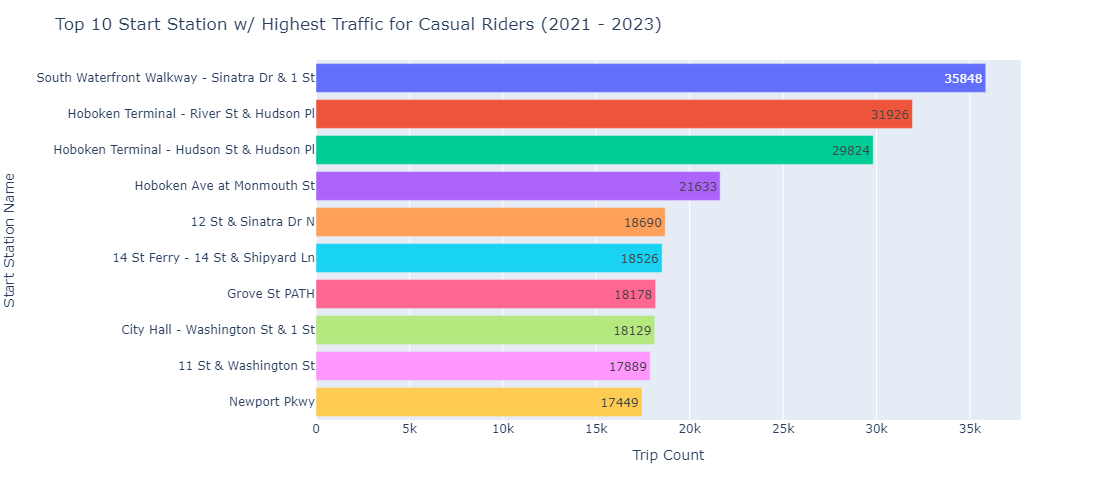

In [24]:
# < Bar Plot > Top 10 highest traffic casual start stations 
fig = px.bar(top10_casual_start_station, y='start_station_name_', x='trip_duration_mins_count', 
             color='start_station_name_', text='trip_duration_mins_count')


# Update Layout
fig.update_layout(title='Top 10 Start Station w/ Highest Traffic for Casual Riders (2021 - 2023)', 
                  xaxis_title='Trip Count', yaxis_title='Start Station Name', 
                  showlegend=False, height=500)


fig.show()

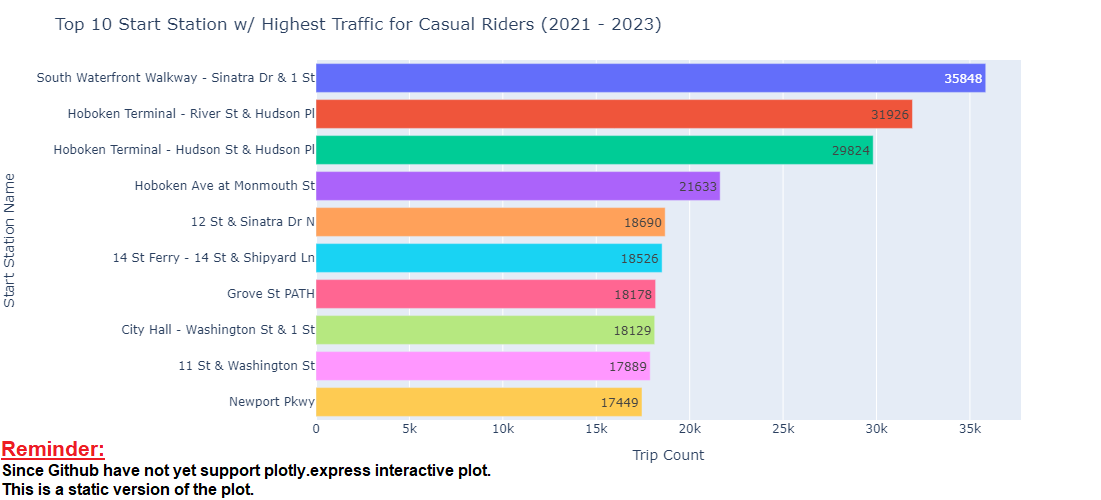

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;">
            The <strong>Top 10 Start Station w/ Highest Traffic for Casual Riders</strong> could be an excellent area for advertising future bike promotions or membership offers.
        </li>
    </ul>
</div>

## EDA | Visualization 6
**`Bar Plot:` Top 10 End Station w/ Highest Traffic ( Casual )**

In [25]:
# Find ` Mean trip duration (minute) ` & ` Count number of trip ` ended at each unique Stations
top10_casual_end_station = citibike_casual.groupby(['end_station_name']).agg({'trip_duration_mins':['count','mean']}).reset_index()


# Change the multindex column into single index 
top10_casual_end_station.columns = ['_'.join(col).strip() for col in top10_casual_end_station.columns]


# Top 10 highest traffic end stations
top10_casual_end_station = top10_casual_end_station.sort_values('trip_duration_mins_count', ascending=False)[:10].reset_index(drop=True)


# Display the dataframe
top10_casual_end_station

end_station_name_  trip_duration_mins_count  \
0  South Waterfront Walkway - Sinatra Dr & 1 St                     37582   
1      Hoboken Terminal - Hudson St & Hudson Pl                     29780   
2       Hoboken Terminal - River St & Hudson Pl                     26751   
3                    Hoboken Ave at Monmouth St                     23206   
4              City Hall - Washington St & 1 St                     19696   
5             14 St Ferry - 14 St & Shipyard Ln                     19600   
6                          12 St & Sinatra Dr N                     19270   
7                                 Grove St PATH                     18931   
8                         11 St & Washington St                     18315   
9                                  Newport Pkwy                     16706   

   trip_duration_mins_mean  
0                13.033739  
1                 8.763271  
2                 9.641058  
3                 9.822193  
4                 9.172643  
5                12.218157  
6                11.855413  
7                 9.446334  
8                10.480861  
9                14.627718

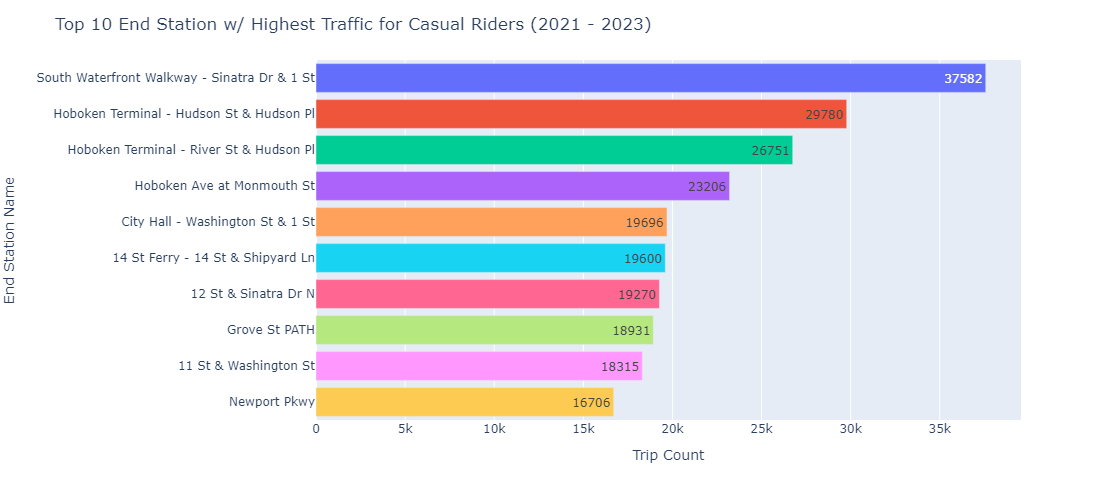

In [26]:
# < Bar Plot > Top 10 highest traffic casual end stations 
fig = px.bar(top10_casual_end_station, y='end_station_name_', x='trip_duration_mins_count', 
             color='end_station_name_', text='trip_duration_mins_count')


# Update layout
fig.update_layout(title='Top 10 End Station w/ Highest Traffic for Casual Riders (2021 - 2023)', 
                  xaxis_title='Trip Count', yaxis_title='End Station Name', 
                  showlegend=False, height=500)


fig.show()

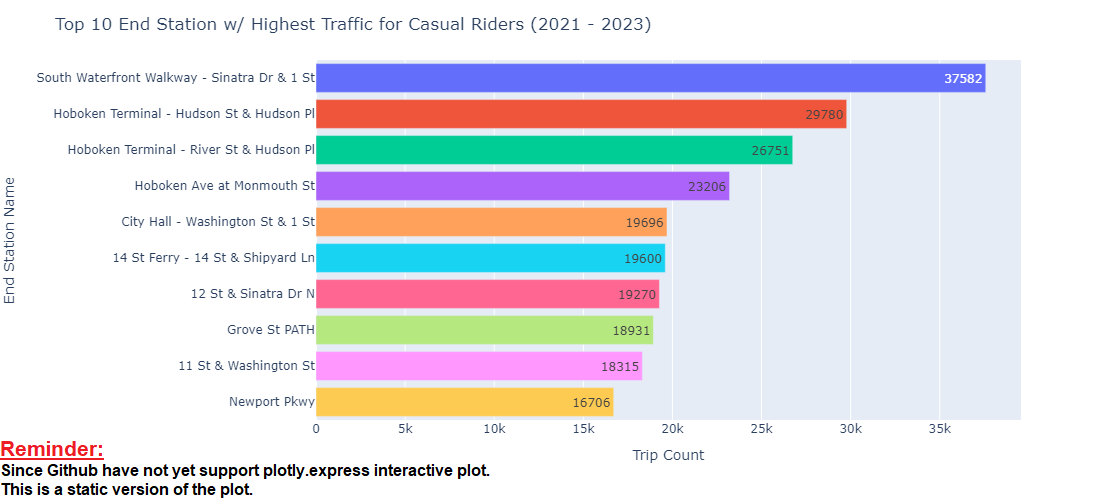

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;">
            Similar to the Top 10 Start Stations, the <strong>Top 10 End Station w/ Highest Traffic for Casual Riders</strong> could be an excellent area for advertising future bike promotions or membership offers.
        </li>
    </ul>
</div>

## EDA | Visualization 7
**`Bar Plot:` Top 10 Start Station w/ Highest Traffic ( Member )**

In [27]:
# Create a subset for members ONLY df
citibike_member = citibike_no_outliers[~mask].reset_index(drop=True)


# Check if the df cotains members only
citibike_member['member_casual'].value_counts(normalize=True)

member_casual
member    1.0
Name: proportion, dtype: float64

In [28]:
# Find ` Mean trip duration (minute) ` & ` Count number of trip ` starts at each unique Station
top10_member_start_station = citibike_member.groupby(['start_station_name']).agg({'trip_duration_mins':['count','mean']}).reset_index()


# Change the multindex column into single index 
top10_member_start_station.columns = ['_'.join(col).strip() for col in top10_member_start_station.columns]


# Top 10 highest traffic `Start Stations`
top10_member_start_station = top10_member_start_station.sort_values('trip_duration_mins_count', ascending=False)[:10].reset_index(drop=True)


# Display the dataframe
top10_member_start_station

start_station_name_  trip_duration_mins_count  \
0                                 Grove St PATH                     93634   
1       Hoboken Terminal - River St & Hudson Pl                     57719   
2      Hoboken Terminal - Hudson St & Hudson Pl                     45852   
3  South Waterfront Walkway - Sinatra Dr & 1 St                     44466   
4                                  Newport PATH                     42916   
5                                 Hamilton Park                     42196   
6                                  Newport Pkwy                     39243   
7                              Marin Light Rail                     36038   
8                                    Harborside                     31257   
9                                     City Hall                     30855   

   trip_duration_mins_mean  
0                 6.172700  
1                 7.234251  
2                 6.946257  
3                 8.972818  
4                 8.445428  
5                 7.564943  
6                10.546437  
7                 7.050532  
8                 7.454959  
9                 7.048434

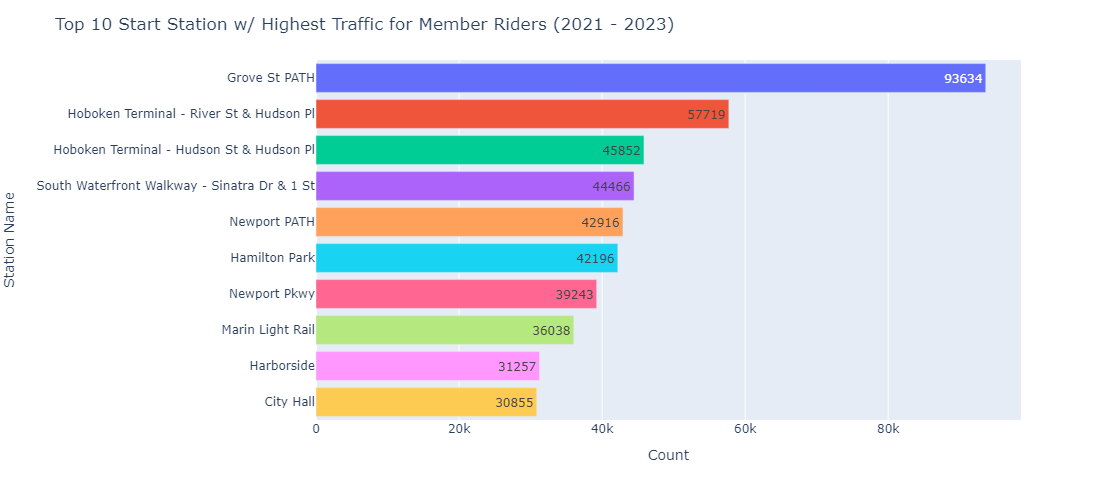

In [29]:
# < Bar Plot > Top 10 highest traffic member start stations 
fig = px.bar(top10_member_start_station, y='start_station_name_', x='trip_duration_mins_count', 
             color='start_station_name_', text='trip_duration_mins_count')


# Update layout
fig.update_layout(title='Top 10 Start Station w/ Highest Traffic for Member Riders (2021 - 2023)', 
                  xaxis_title='Count', yaxis_title='Station Name', 
                  showlegend=False, height=500)


fig.show()

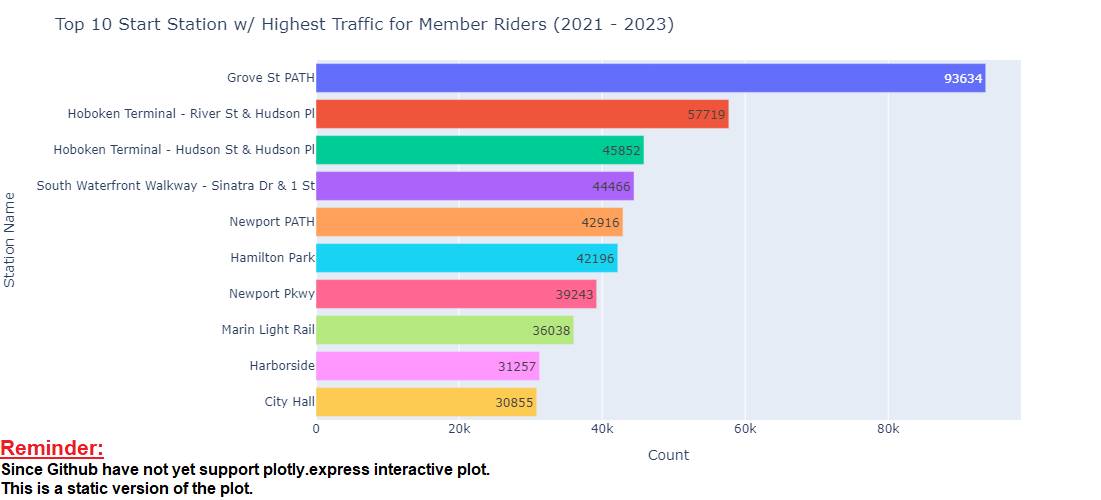

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;">
            The <strong>Top 10 Start Station w/ Highest Traffic for Member Riders</strong> could be an excellent area for surveying membership experiences and identifying areas for improvement. This can help enhance the trip experience and better retain member riders.
        </li>
    </ul>
</div>

## EDA | Visualization 8
**`Grouped Bar Plot:` Top 10 End Station w/ Highest Traffic ( Member )**

In [30]:
# Find ` Mean trip duration (minute) ` & ` Count number of trip ` ended at each unique Stations
top10_member_end_station = citibike_member.groupby(['end_station_name']).agg({'trip_duration_mins':['count','mean']}).reset_index()


# Change the multindex column into single index 
top10_member_end_station.columns = ['_'.join(col).strip() for col in top10_member_end_station.columns]


# Top 10 highest traffic `End Stations`
top10_member_end_station = top10_member_end_station.sort_values('trip_duration_mins_count', ascending=False)[:10].reset_index(drop=True)


# Display the dataframe
top10_member_end_station

end_station_name_  trip_duration_mins_count  \
0                                 Grove St PATH                    101753   
1       Hoboken Terminal - River St & Hudson Pl                     62349   
2      Hoboken Terminal - Hudson St & Hudson Pl                     46577   
3                                  Newport PATH                     43540   
4  South Waterfront Walkway - Sinatra Dr & 1 St                     43132   
5                                 Hamilton Park                     42012   
6                                  Newport Pkwy                     39982   
7                              Marin Light Rail                     35646   
8                                    Harborside                     31525   
9                                     City Hall                     31275   

   trip_duration_mins_mean  
0                 5.708479  
1                 6.402493  
2                 7.009371  
3                 8.141536  
4                 8.522897  
5                 7.696344  
6                10.796129  
7                 7.300953  
8                 7.581898  
9                 7.199096

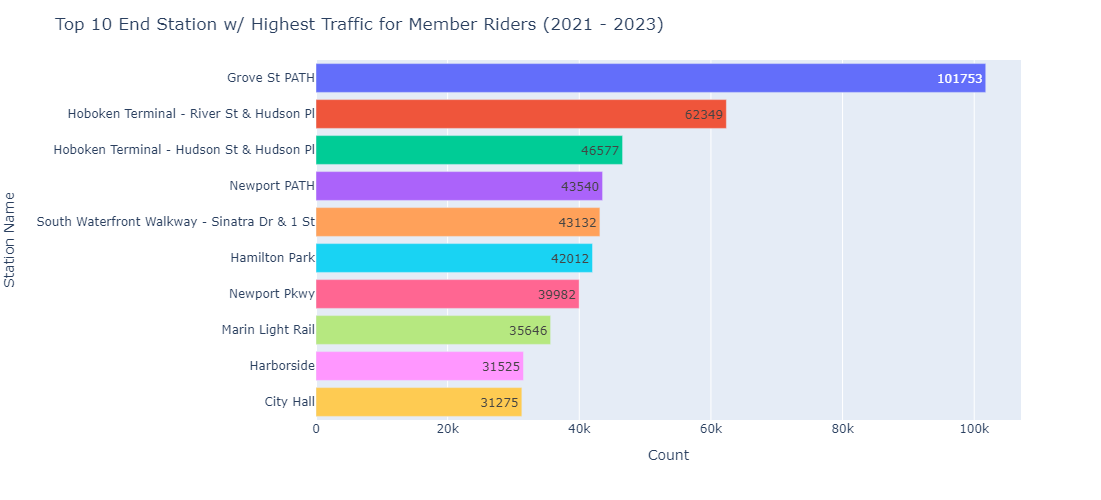

In [31]:
# < Bar Plot > Top 10 highest traffic member end stations 
fig = px.bar(top10_member_end_station, y='end_station_name_', x='trip_duration_mins_count', 
             color='end_station_name_', text='trip_duration_mins_count')


# Update layout
fig.update_layout(title='Top 10 End Station w/ Highest Traffic for Member Riders (2021 - 2023)', 
                  xaxis_title='Count', yaxis_title='Station Name', showlegend=False, height=500)


fig.show()

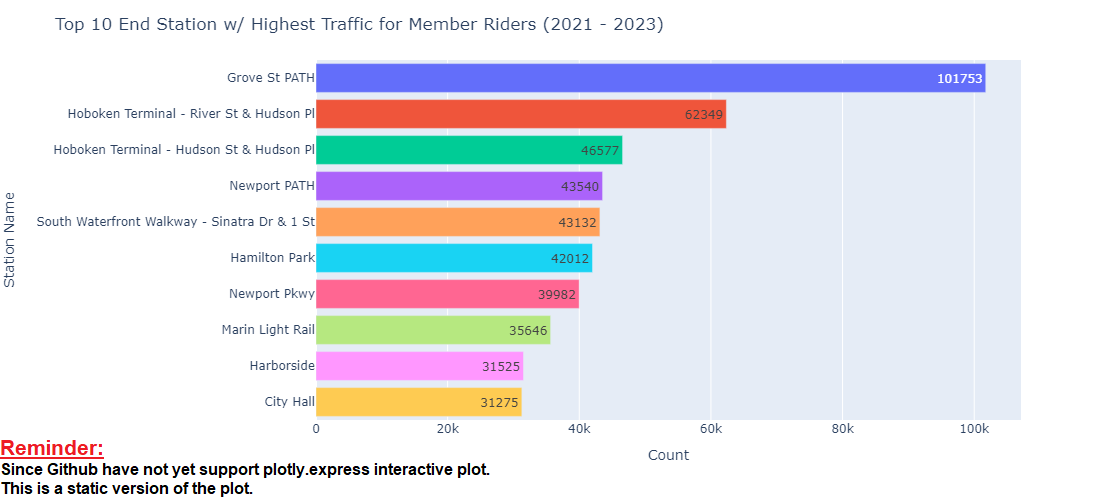

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;">
            Similarly, the <strong>Top 10 End Station w/ Highest Traffic for Member Riders</strong> would also be ideal for surveying membership experiences and identifying areas for improvement. This can help enhance the trip experience and improve member retention.
        </li>
    </ul>
</div>

## EDA | Visualization 9
**`Line Plot:` Weekly Trip Traffic ( Casual & Member )**

In [32]:
# Find Weekly ` Mean trip duration (minute) ` & ` Count number of trip ` for member_casual 
groupped_week_duration = citibike_no_outliers.groupby(['member_casual','week']).agg({'trip_duration_mins':['count','mean']})


# Change the multindex column into single index 
groupped_week_duration.columns = ['_'.join(col).strip() for col in groupped_week_duration.columns]


# Reset Index of df
groupped_week_duration = groupped_week_duration.reset_index()


# Display the df
groupped_week_duration.head()

member_casual      week  trip_duration_mins_count  trip_duration_mins_mean
0        casual  2021-W01                       407                13.167887
1        casual  2021-W02                       409                13.920905
2        casual  2021-W03                       379                12.790422
3        casual  2021-W04                       238                12.904034
4        casual  2021-W05                        91                15.069231

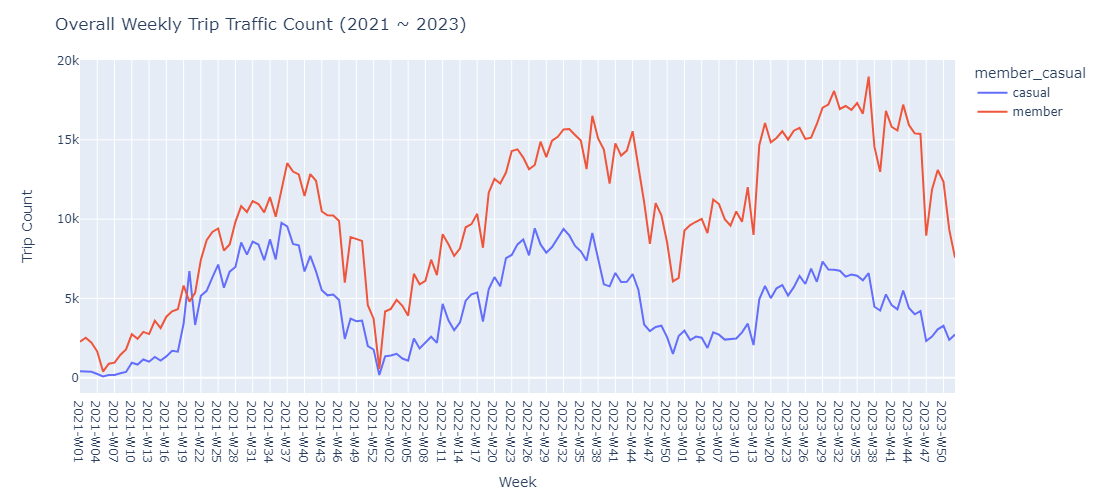

In [33]:
# < Line plot > Weekly trip traffic counts
fig = px.line(groupped_week_duration, x='week', y='trip_duration_mins_count', color='member_casual')


# Update layout
fig.update_layout(title='Overall Weekly Trip Traffic Count (2021 ~ 2023)', 
                  xaxis_title='Week', yaxis_title='Trip Count', height=500)


fig.show()

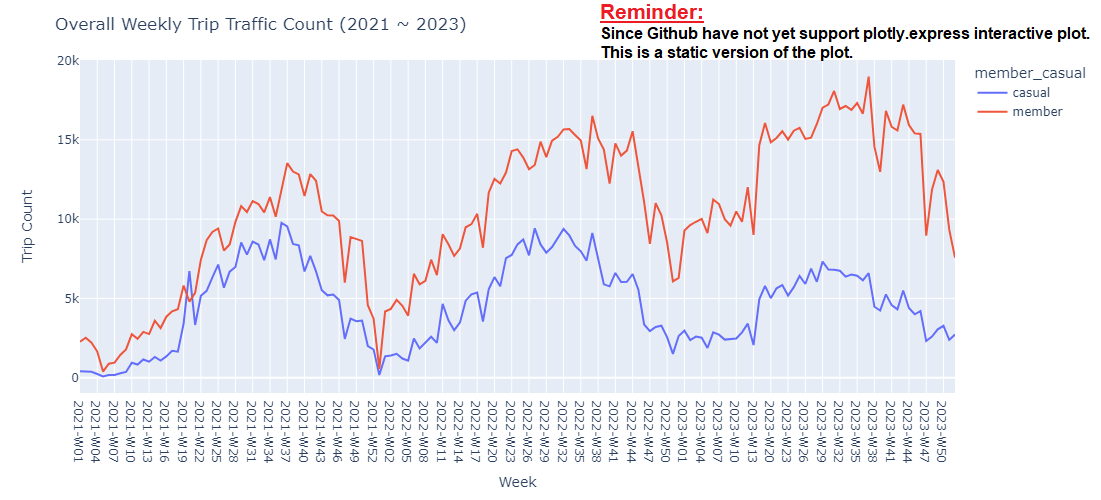

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;">
            The <strong>Overall Weekly Trip Traffic Count for Casual & Member Riders</strong> shows a similar trend from 2021 to 2023. When comparing year-weeks, Member Riders consistently have higher trip traffic counts, while Casual Riders have lower counts. Despite this difference, both types of riders generally follow the same pattern of increases and decreases. However, an exception occurred during <strong>Week 20 of 2021 (around May 17 to May 23)</strong>, when the traffic count for Casual Riders increased while the count for Member Riders decreased.
        </li>       
    </ul>
</div>

## EDA | Visualization 10
**`Line Plot:` Weekly Average Trip Duration ( Casual & Member )**

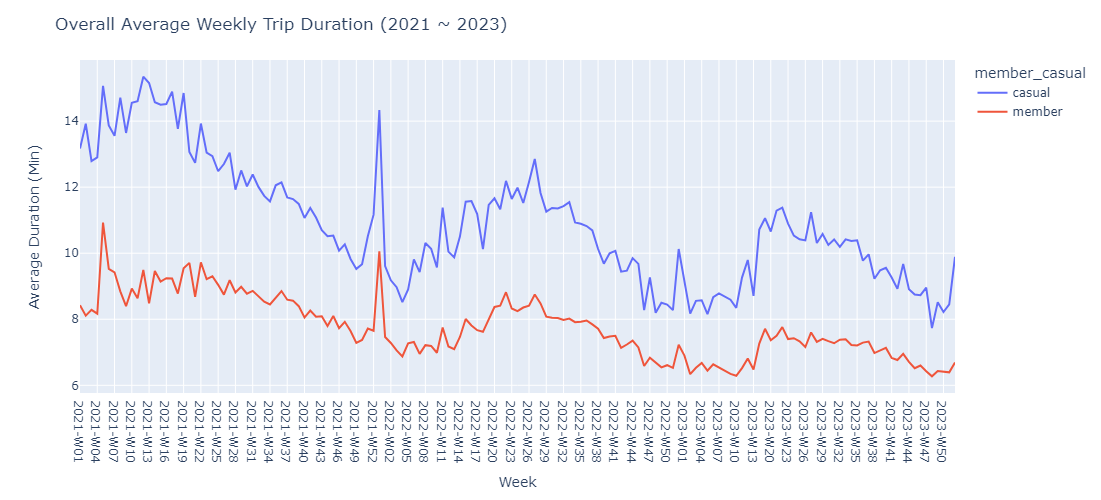

In [34]:
# < Line Plot > Average weekly trip duration (2021 ~ 2023)
fig = px.line(groupped_week_duration, x='week', y='trip_duration_mins_mean', color='member_casual')


# Update layout
fig.update_layout(title='Overall Average Weekly Trip Duration (2021 ~ 2023)', 
                  xaxis_title='Week', yaxis_title='Average Duration (Min)', height=500)


fig.show()

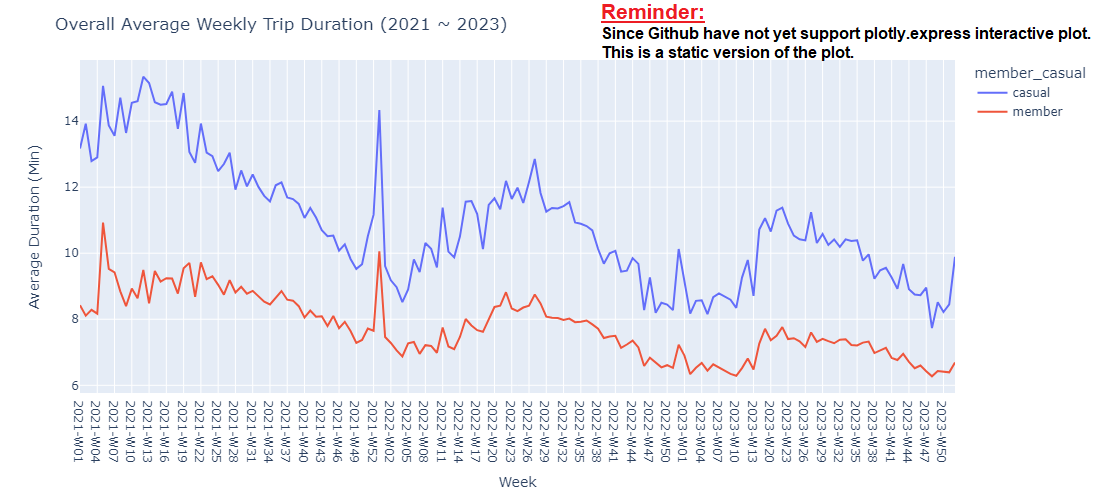

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;">
            The <strong>Average Weekly Trip Duration for Casual & Member Riders</strong> exhibits a similar trend from 2021 to 2023. When comparing year-weeks, Casual Riders generally have longer average trip durations, while Member Riders have shorter durations. Despite this difference, both types of riders tend to follow the same pattern of increases and decreases.
        </li>        
    </ul>
</div>

## EDA | Visualization 11
**`Grouped Bar Plot:` Day of Week Trip Traffic ( Casual & Member )**

In [35]:
# Find Day of Week ` Mean trip duration (minute) ` & ` Count number of trip ` for member_casual 
citibike_day_of_week = citibike_no_outliers.groupby(['day_of_week','member_casual'], observed=False).agg({'trip_duration_mins':['count','mean']})


# Change the multindex column single index
citibike_day_of_week.columns = ['_'.join(col).strip() for col in citibike_day_of_week.columns]


# Round to the nearest 100th decimal
citibike_day_of_week['trip_duration_mins_mean'] = citibike_day_of_week['trip_duration_mins_mean'].round(2)


# Reset the index
citibike_day_of_week = citibike_day_of_week.reset_index()


# Display the table
citibike_day_of_week

day_of_week member_casual  trip_duration_mins_count  \
0          Mon        casual                     80579   
1          Mon        member                    225085   
2          Tue        casual                     84382   
3          Tue        member                    249958   
4          Wed        casual                     92363   
5          Wed        member                    260814   
6          Thu        casual                     94916   
7          Thu        member                    252439   
8          Fri        casual                    107781   
9          Fri        member                    238250   
10         Sat        casual                    133515   
11         Sat        member                    194542   
12         Sun        casual                    116234   
13         Sun        member                    173506   

    trip_duration_mins_mean  
0                     10.82  
1                      7.43  
2                     10.15  
3                      7.26  
4                     10.10  
5                      7.28  
6                     10.06  
7                      7.32  
8                     10.51  
9                      7.52  
10                    11.76  
11                     8.37  
12                    12.18  
13                     8.50

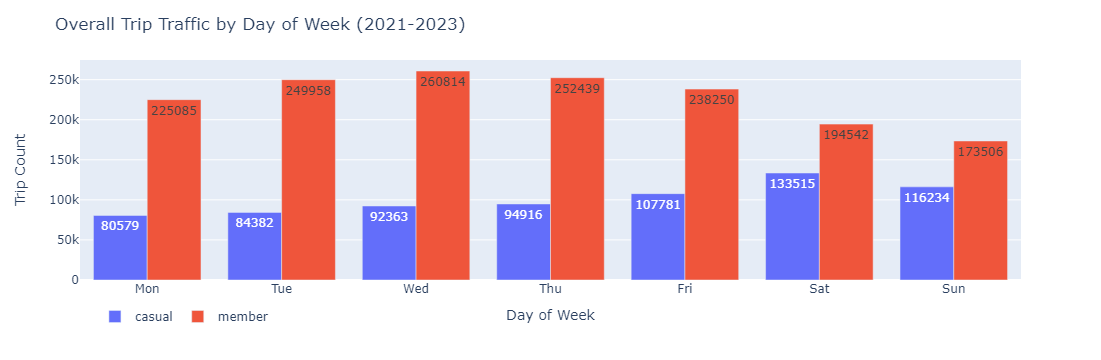

In [36]:
# < Grouped Bar Plot > Overall Trip Traffic by Day of Week 
fig =px.bar(citibike_day_of_week, x='day_of_week', y='trip_duration_mins_count', color='member_casual', 
            barmode='group', text='trip_duration_mins_count')


# Update layout
fig.update_layout(title='Overall Trip Traffic by Day of Week (2021-2023)', 
                  xaxis_title='Day of Week', yaxis_title='Trip Count', 
                  legend_title=' ', legend_orientation='h')


fig.show()

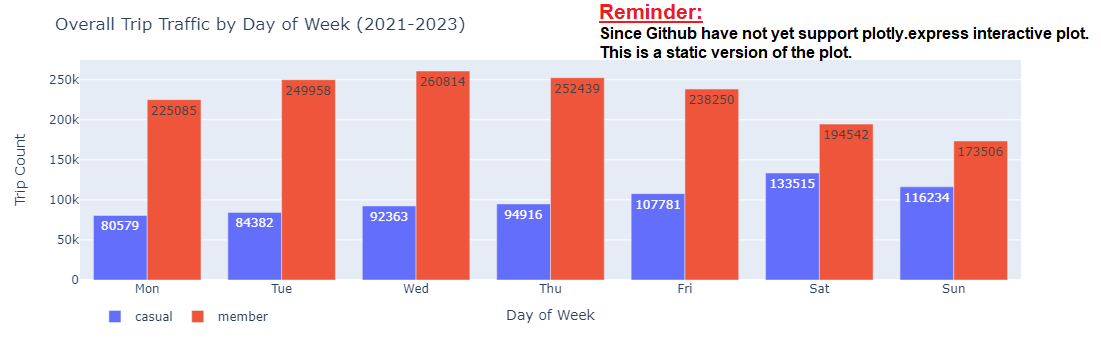

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <p>
        The <strong>Overall Trip Traffic by Day of Week</strong> shows that Member Riders consistently have more traffic than Casual Riders, as seen in previous traffic count plots by quarter, month, and week. However, the focus here is on the <strong>distribution of traffic across different Day of Week</strong>.
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;">There are differences in biking habits between the two rider types.<strong>Member Rider traffic is concentrated on weekdays</strong>, while <strong>Casual Rider traffic is concentrated on weekends</strong>.
        </li>
        <li style="margin-bottom: 10px;">Since Casual Rider traffic is concentrated on weekends, Citibike can consider introducing a new weekend membership pass specifically for weekend biking enthusiasts.
        </li>
    </ul>
</div>

## EDA | Visualization 12
**`Grouped Bar Plot:` Day of Week Average Trip Duration ( Casual & Member )**

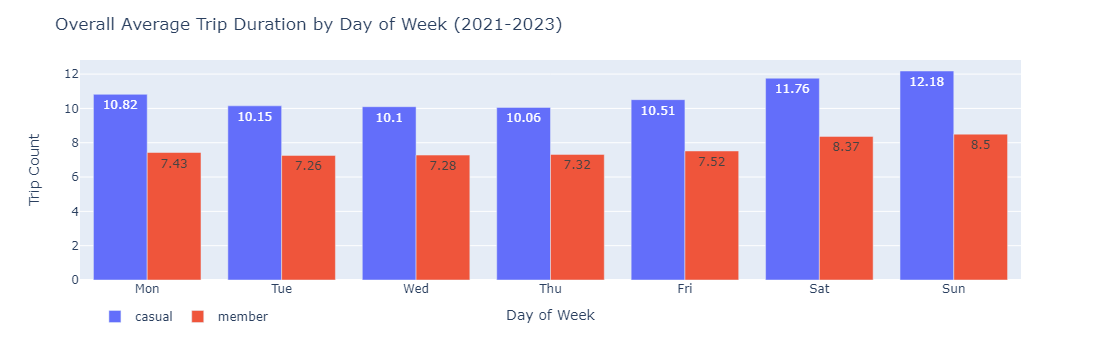

In [37]:
# < Grouped Bar Plot > Overall Trip Traffic by Day of Week 
fig =px.bar(citibike_day_of_week, x='day_of_week', y='trip_duration_mins_mean', color='member_casual', 
            barmode='group', text='trip_duration_mins_mean')


# Update layout
fig.update_layout(title='Overall Average Trip Duration by Day of Week (2021-2023)', 
                  xaxis_title='Day of Week', yaxis_title='Trip Count', 
                  legend_title=' ', legend_orientation='h')


fig.show()

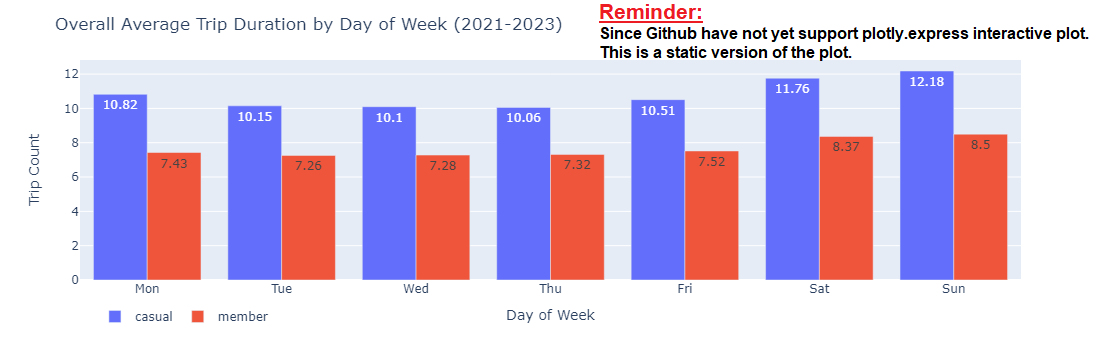

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;">
            The <strong>Overall Day of Week Trip Traffic Count for Casual & Member</strong> shows that Casual riders has a higher average trip duration across all days in a week than member riders.
        </li>    
        <li style="margin-bottom: 10px;">
            Both Casual and Member riders have a higher average trip duration on weekends than weekdays.
        </li>
    </ul>
</div>

## EDA | Visualization 9
**`Histogram:` Time of the Day Traffic Distribution ( Casual & Member )**

In [38]:
# Extract Only the `time of day` when a trip started
citibike_df['time_of_the_day'] = citibike_df['started_at'].dt.strftime('%H:%M')

# Convert the 'time_of_the_day' string to datetime 
citibike_df['time_of_the_day'] = pd.to_datetime(citibike_df['time_of_the_day'], format='%H:%M')

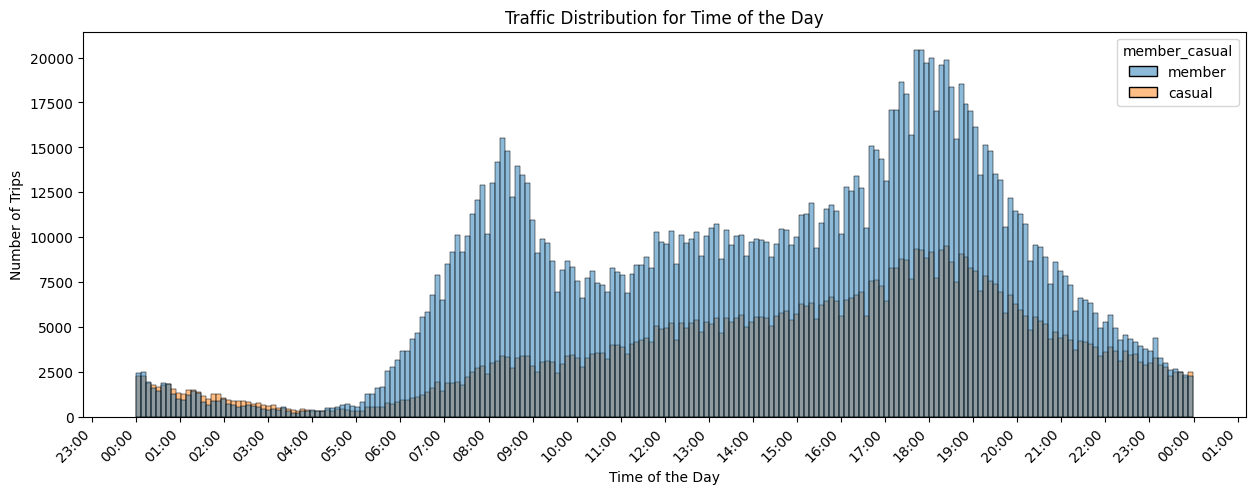

In [39]:
import matplotlib.dates as mdates

# Plot Histogram
plt.figure(figsize=(15,5))
sns.histplot(data=citibike_df, x='time_of_the_day', hue='member_casual')


# Set x-axis major locator to every 1 hour
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))


# Format the x-axis to show time only
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))


# Update layout
plt.title('Traffic Distribution for Time of the Day')       # Title
plt.xlabel('Time of the Day')                               # x-axis Title
plt.ylabel('Number of Trips')                               # y-axis Title
plt.xticks(rotation=45, horizontalalignment='right')        # Adjust x-axis labels


plt.show()

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;">
            For <strong>Member Riders</strong>, there are two distinct traffic spikes during the day. The first spike, Spike-I, occurs from 6:00 AM to 9:00 AM, while the second spike, Spike-II, occurs from 5:00 PM to 9:00 PM. These spikes correspond with the typical morning and evening rush hours. Where people commute to work and off work. 
        </li>        
        <li style="margin-bottom: 10px;">
            For <strong>Casual Riders</strong>, there's only one notable traffic spike during the day. Traffic begins to rise around 8:00 AM and steadily declines after 7:00 PM. The absence of a morning rush hour spike may be that many Casual Riders are not daily commuters. Their biking patterns are different from those of regular members, causing no traffic spike in the morning.
        </li>
    </ul>
</div>

## EDA | Visualization 14
**`Line Plot:` Annual Day to Day Trip Count ( Casual & Member )**

In [40]:
# Groupby trip counts for each date in a year
day_of_year_count = citibike_df.groupby(['year','date'])[['day_of_week']].count().reset_index()


# Rename column
day_of_year_count = day_of_year_count.rename(columns={'day_of_week':'trip_count'})

# Display the df
day_of_year_count.head(5)

year      date  trip_count
0  2021  01/01/21         206
1  2021  01/02/21         502
2  2021  01/03/21         159
3  2021  01/04/21         414
4  2021  01/05/21         382

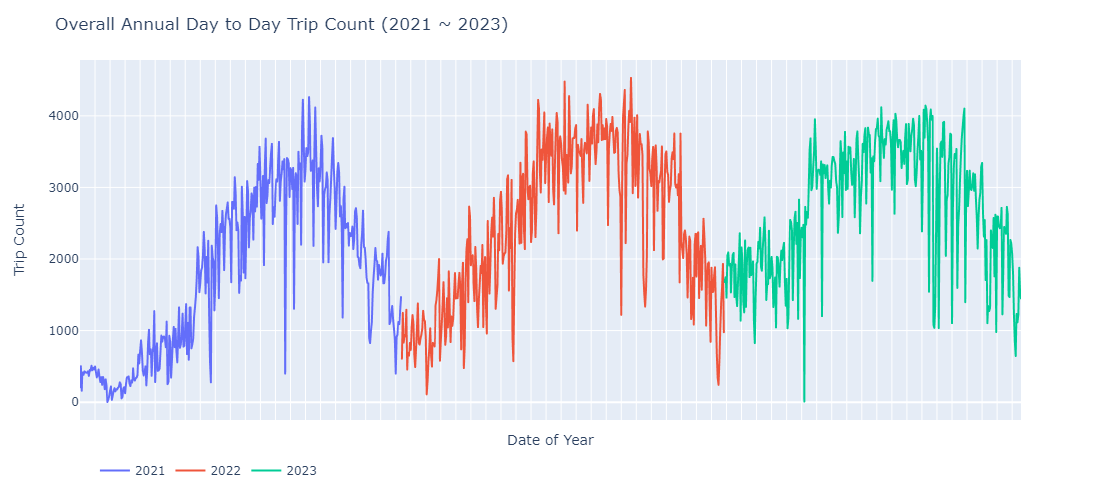

In [41]:
# < Line Plot > Overall Annual Day to Day Trip Count (2021 ~ 2023)
fig = px.line(day_of_year_count, x='date', y='trip_count', color='year')


# Update layout
fig.update_layout(title='Overall Annual Day to Day Trip Count (2021 ~ 2023)', 
                  xaxis_title='Date of Year', yaxis_title='Trip Count', 
                  height=500,
                  legend_title=' ', legend_orientation='h',    
                  xaxis=dict(showticklabels=False))                        # Hide x-axis tick labels


fig.show();

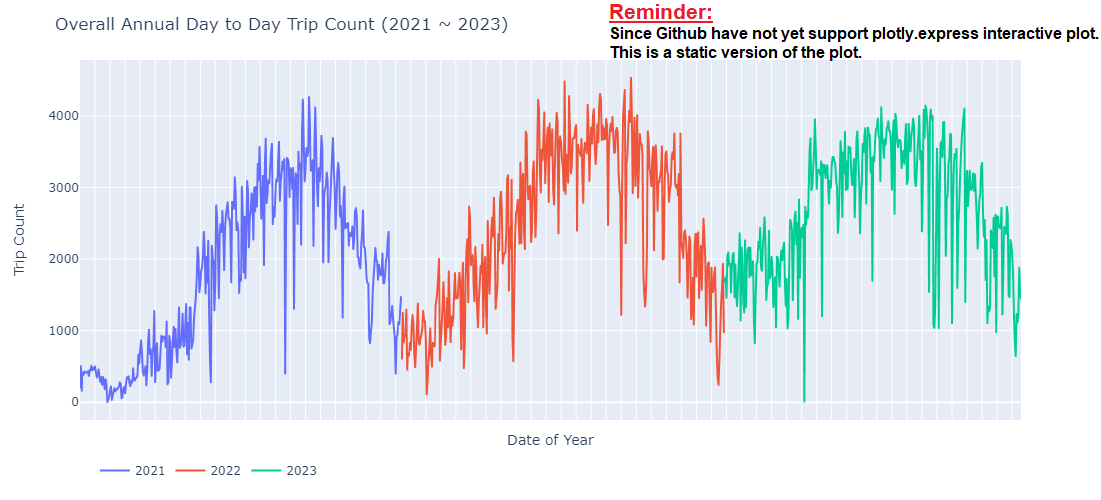

**Insight** 
<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;">
            Here is a view of  <strong>Overall Annual Day to Day Trip Count for Casual & Member</strong> From 2021 to 2023. The line plot illustrates fluctuations in trip counts caused by seasonal cycles and customers' biking habits across 3 years. The trends from previous three years they shared a similar pattern of an inverted U-curve.
    </ul>        
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6);">Conclusion</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <ul style="margin-bottom: 15px;">
        <li style="margin-bottom: 10px;">
            From 2021 to 2023 <strong>Member Riders made more trip traffic counts</strong> than Casual Riders across all time frames: year, quarter, month, week, and day of the week. On the other hand, <strong>Casual Riders have a longer average trip duration</strong> than Member Riders across the same time frames: year, quarter, month, week, and day of the week. 
        </li><br>
        <li style="margin-bottom: 10px;">
            During each year's <strong>Quater 2 (Apr - Jun) & Quater 3 (Jul - Sep)</strong> the overall trip traffic count and average trip duration are the highest for both Casual and Member Riders. This reflects a seasonal cycle in customers' biking habits.
        </li><br>
        <li style="margin-bottom: 10px;">
            On a weekly basis <strong>Member Rider trip traffic is busiest during weekdays</strong> reflecting their use of bikes for commuting and daily activities. In contrast, <strong>Casual Rider trip traffic is busiest during weekends</strong>, indicating that they use bikes more for leisure and recreational activities.
        </li><br>
        <li style="margin-bottom: 10px;">
            The <strong>Overall Monthly Average Trip Duration (mins) from 2021 to 2023 has been decreasing each year</strong>. This trend is worth investigating as it may indicate a potential increase in customer churn rates. Possible reasons for this decline could include changes in pricing, alterations in policies, or shifts in customer behavior. 
        </li><br>
        <li style="margin-bottom: 10px;">
            For <strong>Member Riders, there are two distinct traffic spikes during the day</strong>. The first spike, from 6:00 AM to 9:00 AM, and the second spike, from 5:00 PM to 9:00 PM, correspond with the typical morning and evening rush hours when people commute to and from work. In contrast, <strong>Casual Riders experience only one notable traffic spike during the day</strong>, with traffic beginning to rise around 8:00 AM and steadily declining after 7:00 PM. The absence of a morning rush hour spike suggests that many Casual Riders are not daily commuters, resulting in different biking patterns from regular members.
        </li>
    </ul>        
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6);">Recommendations</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <p><strong>1. Advertistment:</strong>
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;">If Citibike is planning to advertise their membership campaign in the future, the best areas to target are the high traffic Casual Rider start/end stations with high average trip durations. 
    </ul>    
    <br/>
    <p>
    <strong>2. New Membership:</strong>
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;">Since Casual Rider traffic is concentrated on weekends, Citibike should consider introducing a new weekend membership pass specifically for weekend biking enthusiasts. This could attract a new group of member riders to the system.
        </li>
    </ul>
    <br/>
<p>
        <strong>3. Surveying & Improvement:</strong>
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;">Surveying both Casual and Member Riders at high-density traffic stations about their biking and parking experiences can help maintain a high-quality biking experience overall. This feedback can be used to enhance services and potentially increase membership retention rates.
        </li>
    </ul>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6);">Further Analysis</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">     
<ul style="margin-bottom: 10px;">
    <li style="margin-bottom: 10px;">
    <strong>Finanical Time Series Analysis</strong>: If access to data on each trip's transaction is available, a financial analysis can be performed to evaluate revenue trends, customer spending patterns, and the financial impact of membership option. This analysis can help identify peak revenue periods, assess the profitability of different pricing strategies, and optimize financial performance by aligning pricing and promotions with customer behavior and demand. 
    </li><br>
    <li style="margin-bottom: 10px;">
    <strong>Time Series Forecasting</strong>: If access to data linking each <code>trip_id</code> to a specific user_id(anonymized), we can perform detailed time series forecasting to predict future user trip volumes, user activity patterns, and revenue trends. This allows us to analyze individual user behavior over time, identify trends in trip frequency and duration, and forecast how changes in user patterns might impact overall system performance. Such insights can guide targeted marketing efforts, optimize resource allocation, and enhance strategic planning to better meet user needs and improve operational efficiency.
    </li>
    </ul>
</div>

<h2 style="color: white; padding: 10px; border-radius: 5px; background: linear-gradient(to right, #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6);">Reference</h2>

<div style="border: 4px solid; 
            padding: 20px; 
            border-radius: 10px;
            border-image: linear-gradient(to right,  #0033A0, #0033A0, #0033A0, #3E82CF, #ADD8E6, #ADD8E6) 1;">
    <p><strong>I would like to mention some excellent references that I learned from:</strong></p>
    <ul style="list-style-type: disc; padding-left: 20px; margin-top: 10px;">
        <li style="margin-bottom: 10px;"><a href="https://citibikenyc.com/system-data" target="_blank">https://citibikenyc.com/system-data</a>
        </li>
        <li style="margin-bottom: 10px;"><a href="https://citibikenyc.com/pricing" target="_blank">https://citibikenyc.com/pricing</a>
        </li>
    </ul>    
</div>